In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Arc
import seaborn as sns
import math

# GPS Coordinates Conversion + Mapping

Helper Functions

In [2]:
def lat_con(lat):
    #y0 = 32.887444
    y0 = 32.887447
    
    output = 95 - ((lat - y0)*100000)
    return output

def long_con(long):
    #x0 = -117.2403311
    x0 = -117.240354
    
    output = (long - x0)*100000
    return output

def r(point, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "low performance" version since it's recalculating
    the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
    It's more readable than the next function, though.
    """
    x, y = point
    ox, oy = origin

    qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
    qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

    return qx, qy

In [3]:
def players_pitch(filename):
    filename['ConLat'] = filename.Latitude.apply(lat_con)
    filename['ConLong'] = filename.Longitude.apply(long_con)
    
    lat_list = []
    long_list = []
    for i in filename[['ConLat', 'ConLong']].values:
        a, b = r((i[0],i[1]), 0.0488132, origin=(95,0))
        lat_list.append(a)
        long_list.append(b)
        
    return lat_list, long_list



In [4]:
a, b = players_pitch(pd.read_excel('Emily.xlsx'))
c, d = players_pitch(pd.read_excel('Erika.xlsx'))
e, f = players_pitch(pd.read_excel('Lily.xlsx'))

In [5]:
g, h = players_pitch(pd.read_excel('Natalie.xlsx'))

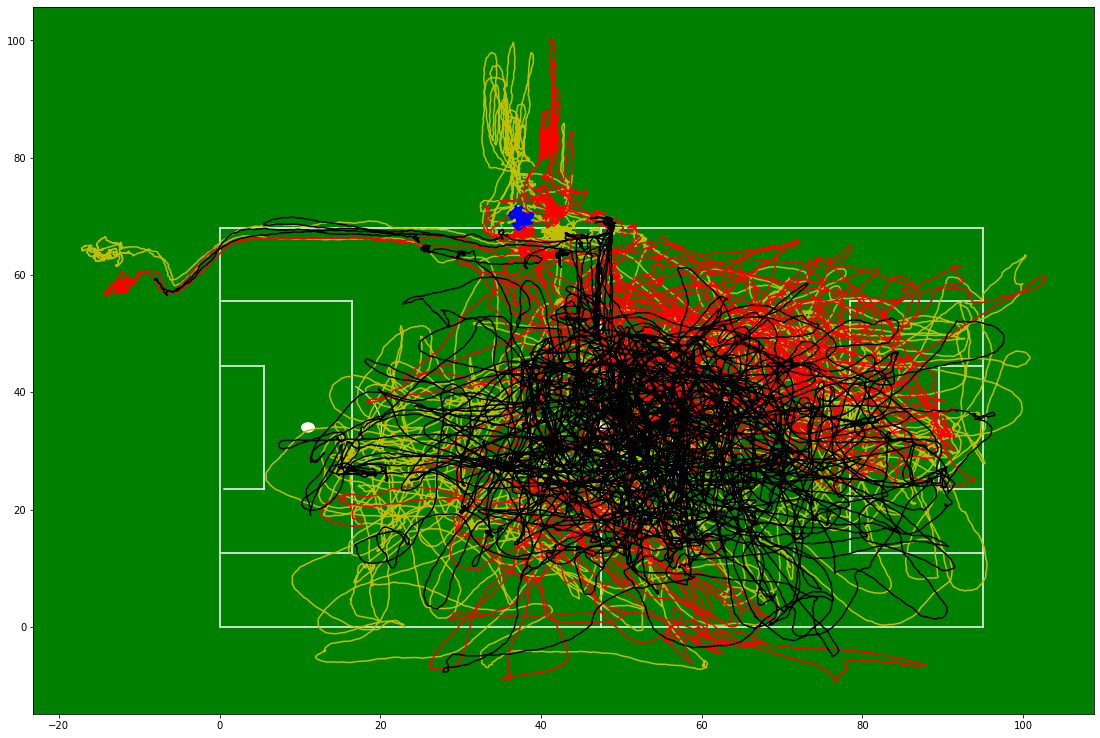

In [6]:
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(19, 13)
    ax=fig.add_subplot(1,1,1)
    ax.set_facecolor("green")

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,68], color="white")
    plt.plot([0,95],[68,68], color="white")
    plt.plot([95,95],[68,0], color="white")
    plt.plot([95,0],[0,0], color="white")
    plt.plot([47.5,47.5],[0,68], color="white")

    #Left Penalty Area
    plt.plot([16.5,16.5],[55.5,12.5],color="white")
    plt.plot([0,16.5],[55.5,55.5],color="white")
    plt.plot([16.5,0],[12.5,12.5],color="white")

    #Right Penalty Area
    plt.plot([95,78.5],[55.5,55.5],color="white")
    plt.plot([78.5,78.5],[55.5,12.5],color="white")
    plt.plot([78.5,95],[12.5,12.5],color="white")

    #Left 6-yard Box
    plt.plot([0,5.5],[44.5,44.5],color="white")
    plt.plot([5.5,5.5],[44.5,23.5],color="white")
    plt.plot([5.5,0.5],[23.5,23.5],color="white")

    #Right 6-yard Box
    plt.plot([95,89.5],[44.5,44.5],color="white")
    plt.plot([89.5,89.5],[44.5,23.5],color="white")
    plt.plot([89.5,95],[23.5,23.5],color="white")

    #Prepare Circles
    centreCircle = plt.Circle((47.5,34),9.15,color="white",fill=False)
    centreSpot = plt.Circle((47.5,34),0.8,color="white")
    leftPenSpot = plt.Circle((11,34),0.8,color="white")
    rightPenSpot = plt.Circle((84,34),0.8,color="white")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,34),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((84,34),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Display Pitch
    plt.plot(a, b, 'y')
    plt.plot(c, d, 'r')
    plt.plot(e, f, 'b')
    plt.plot(g, h, 'k')
    plt.show()